In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font_scale=1)

In [2]:
real = pd.read_csv('parsed_data.csv')
fake = pd.read_csv('fake.csv')

In [3]:
fake.shape, real.shape

((12999, 20), (13000, 20))

In [4]:
real_nc = real[real['ord_in_thread'] == 0].copy()
fake_nc = fake[fake['ord_in_thread'] == 0].copy()

In [5]:
print real_nc.shape
print fake_nc.shape

(3485, 20)
(12328, 20)


In [6]:
real_nc['text'] = real_nc['text'].map(lambda s: str(s))
fake_nc['text'] = fake_nc['text'].map(lambda s: str(s))

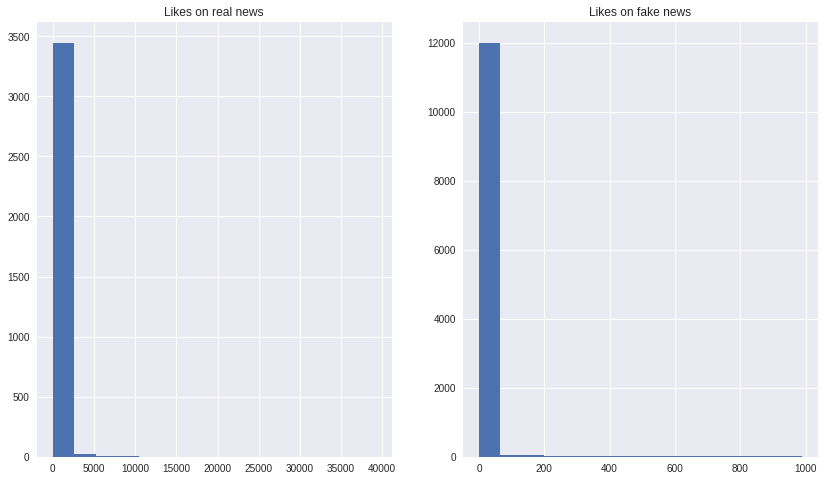

In [7]:
f, ax = plt.subplots(1,2, figsize=(14,8))
real_nc['likes'].hist(bins=15, ax=ax[0])
fake_nc['likes'].hist(bins=15, ax=ax[1])

ax[0].set_title('Likes on real news')
ax[1].set_title('Likes on fake news')
plt.show()

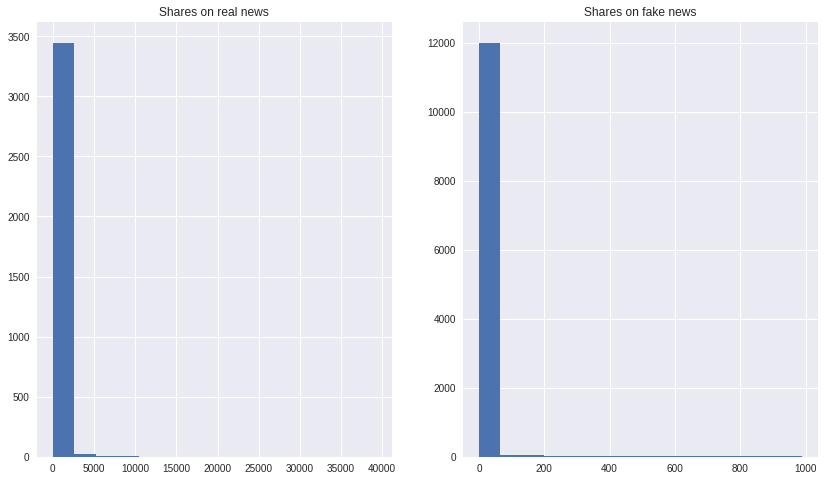

In [8]:
f, ax = plt.subplots(1,2, figsize=(14,8))
real_nc['shares'].hist(bins=15, ax=ax[0])
fake_nc['shares'].hist(bins=15, ax=ax[1])

ax[0].set_title('Shares on real news')
ax[1].set_title('Shares on fake news')
plt.show()

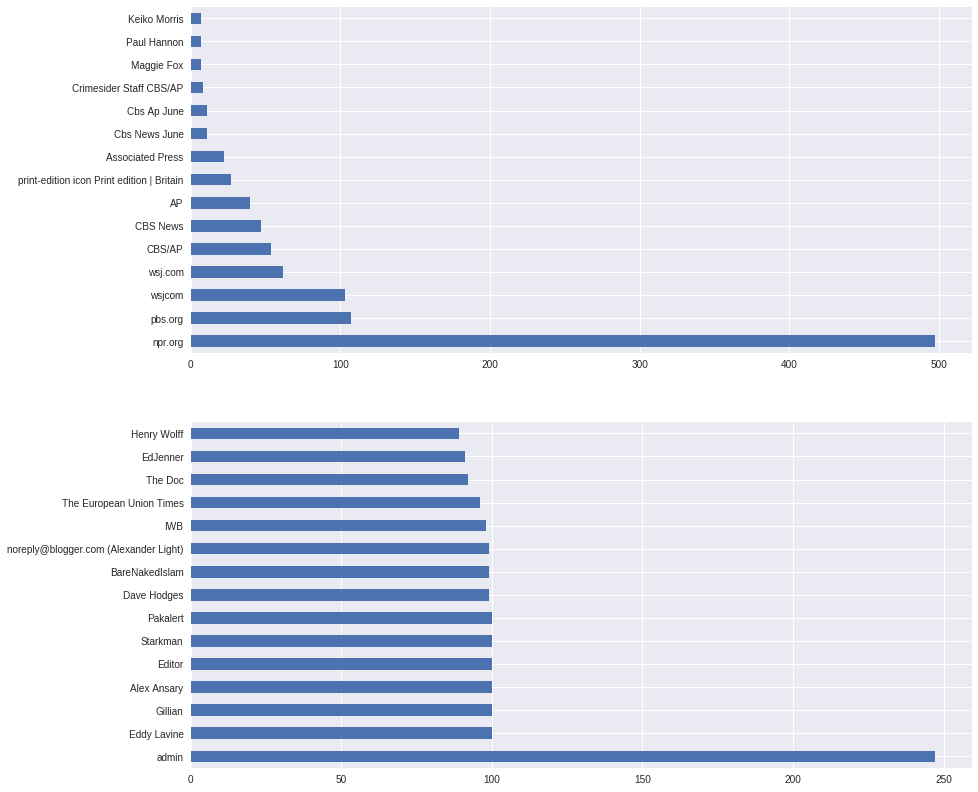

In [9]:
f, ax = plt.subplots(2,1, figsize=(14,14))

#mask = real_nc['author'].value_counts() != 1
real_nc['author'].value_counts().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[0])

#mask = fake_nc['author'].value_counts() > 30
fake_nc['author'].value_counts().sort_values(ascending=False).head(15).plot(kind='barh', ax=ax[1])

plt.show()

In [10]:
# Any author that has both fake and real news?
sum([True if i in fake_nc['author'].values else False for i in real_nc['author'].values])

9

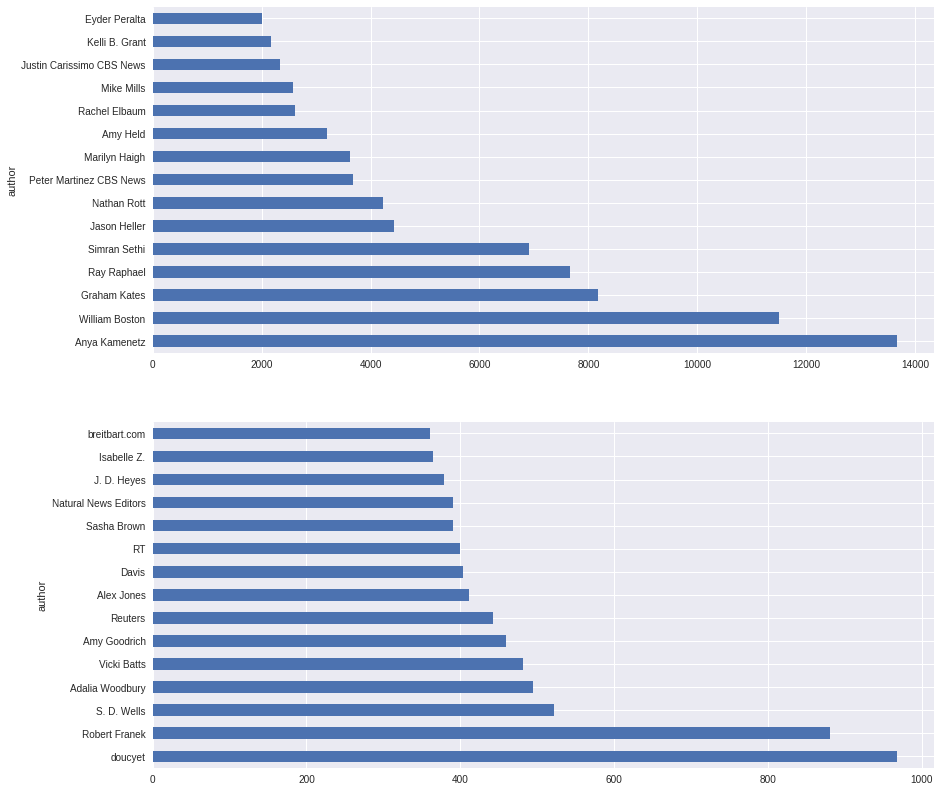

In [11]:
f, ax = plt.subplots(2,1, figsize=(14,14))

real_nc.groupby('author')['likes'].mean().sort_values(ascending=False).head(15).\
plot(kind='barh', ax=ax[0])

fake_nc.groupby('author')['likes'].mean().sort_values(ascending=False).head(15).\
plot(kind='barh', ax=ax[1])

plt.show()

In [12]:
real_nc[real_nc['author'] == 'Joe Palazzolo']

,author,comments,country,crawled,domain_rank,language,likes,main_image,ord_in_thread,participants_count,published,replies_count,section_title,shares,site,spam_score,text,title,type,uuid
1707,Joe Palazzolo,0,US,2017-06-10T12:49:12.008+03:00,387.0,english,996,https://si.wsj.net/public/resources/images/BN-...,0,1,2017-06-10T04:14:00.000+03:00,0,"News Article Archive from M06 09, 2017 - Wsj.com",996,wsj.com,0.011,Government lawyers said Friday that the U.S. C...,Justice Department Argues Trump’s Businesses C...,normal,6b7e8b886377ccedaf825f2f591585abd07af6eb


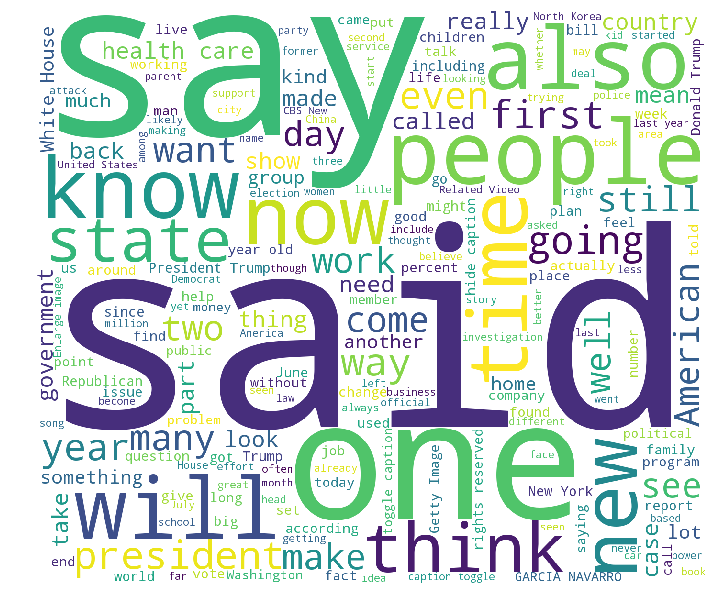

In [13]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(12,14))

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1400,
                          height=1200
                         ).generate(" ".join(real_nc['text'].values))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

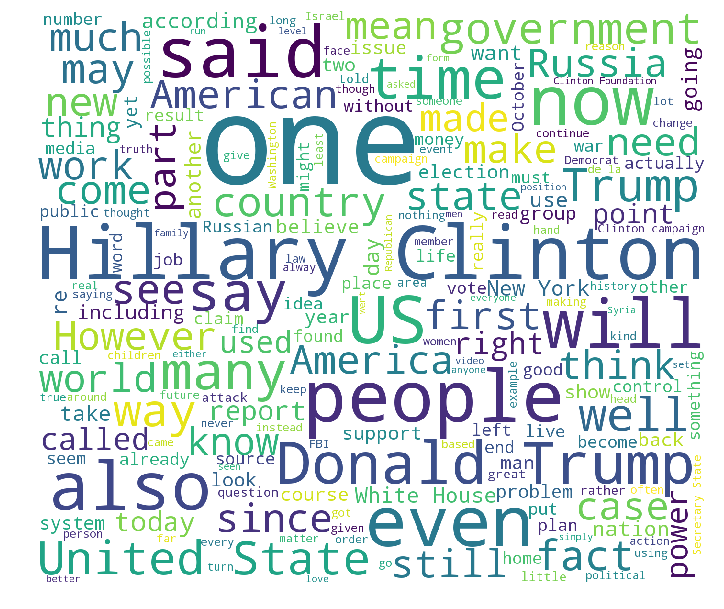

In [14]:
plt.figure(figsize=(12,14))

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1400,
                          height=1200
                         ).generate(" ".join(fake_nc['text'].values))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

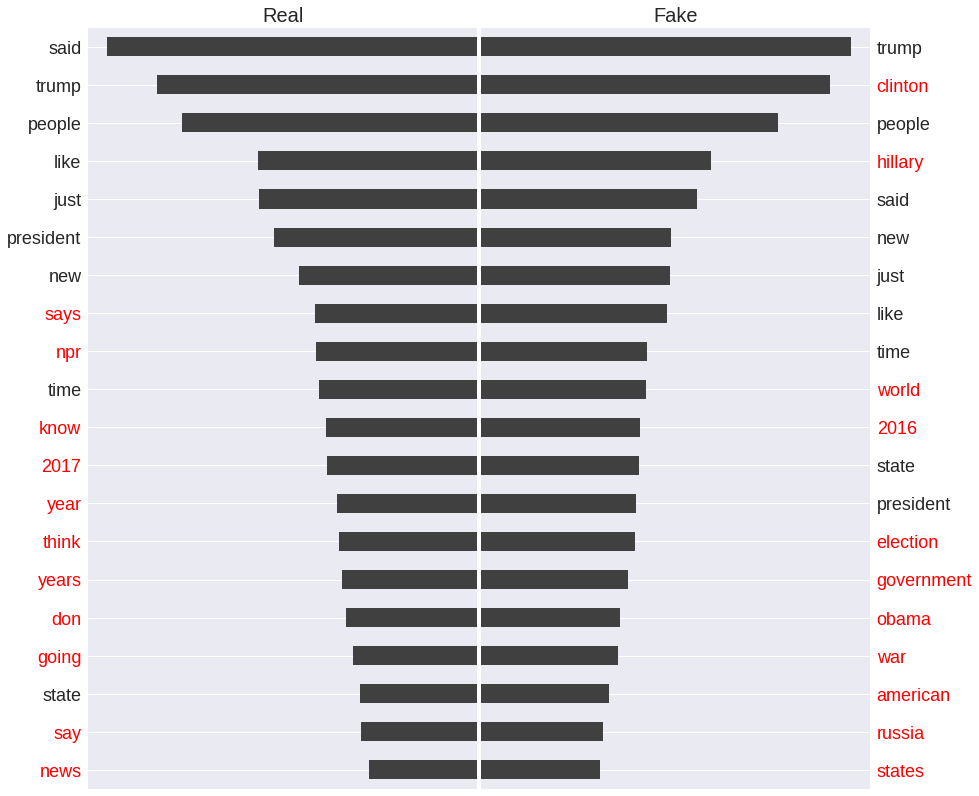

In [16]:
f, ax = plt.subplots(1,2, figsize=(14,14))

cv = CountVectorizer(stop_words='english', ngram_range=(1,1), max_features=1000)
gram_1 = cv.fit_transform(real['text'].dropna())
real_cv = pd.DataFrame(gram_1.toarray(), columns=cv.get_feature_names())

gram_1f = cv.fit_transform(fake['text'].dropna())
fake_cv = pd.DataFrame(gram_1f.toarray(), columns=cv.get_feature_names())

real_cv.sum(axis=0).sort_values().tail(20).plot(kind='barh', ax = ax[0], color='0.25')
fake_cv.sum(axis=0).sort_values().tail(20).plot(kind='barh', ax = ax[1], color='0.25')

ax[0].tick_params(labelsize=18)
ax[0].set_title('Real', fontsize=20)
ax[0].invert_xaxis()
ax[0].set_xticks([])

ax[1].tick_params(labelsize=18)
ax[1].get_yaxis().set_ticks_position('right')
ax[1].set_title('Fake', fontsize=20)
ax[1].set_xticks([])

#f.tight_layout()
plt.subplots_adjust(wspace=0.01)

ax0_ticks = ax[0].get_yticklabels()
ax1_ticks = ax[1].get_yticklabels()

ax0_ticks_v = [label.get_text() for label in ax0_ticks]
ax1_ticks_v = [label.get_text() for label in ax1_ticks]

for xtick in ax0_ticks:
    if xtick.get_text() not in ax1_ticks_v:
        xtick.set_color('r')

for xtick in ax1_ticks:
    if xtick.get_text() not in ax0_ticks_v:
        xtick.set_color('r')

plt.show()

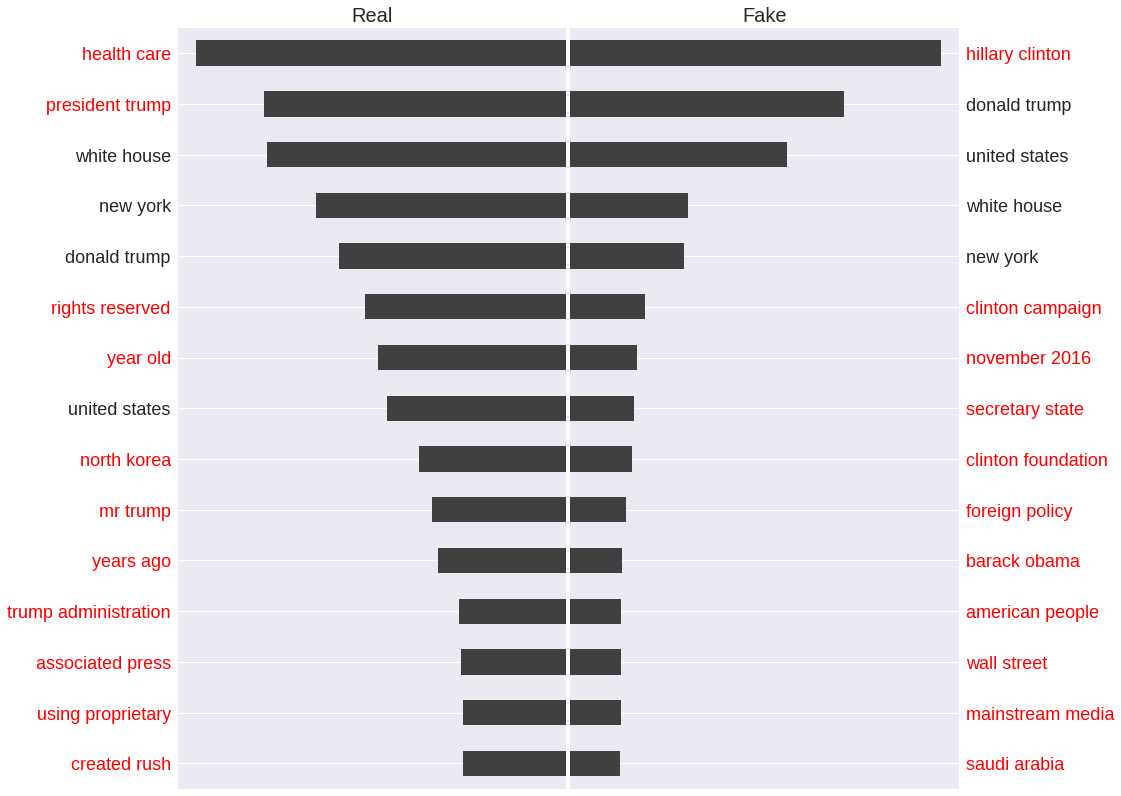

In [17]:
f, ax = plt.subplots(1,2, figsize=(14,14))

cv = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=1000)
gram_1 = cv.fit_transform(real['text'].dropna())
real_cv = pd.DataFrame(gram_1.toarray(), columns=cv.get_feature_names())

gram_1f = cv.fit_transform(fake['text'].dropna())
fake_cv = pd.DataFrame(gram_1f.toarray(), columns=cv.get_feature_names())

filter_list = ['garcia navarro', 'getty images', 'hide caption', 'toggle caption', \
               'caption toggle', 'cbs news', 'enlarge image', 'related videos', 'ha ha',\
               'july 2017', 'don know', 'npr org', 'npr programming', 'terms use',\
               'copyright 2017', 'www npr', 'visit website', '2017 npr', 'form updated',\
               'audio record', 'pages www']

real_cv[[c for c in real_cv.columns if c not in filter_list]].sum(axis=0).sort_values()\
.tail(15).plot(kind='barh', ax = ax[0], color='0.25')
fake_cv.sum(axis=0).sort_values().tail(15).plot(kind='barh', ax = ax[1], color='0.25')

ax[0].tick_params(labelsize=18)
ax[0].set_title('Real', fontsize=20)
ax[0].invert_xaxis()
ax[0].set_xticks([])

ax[1].tick_params(labelsize=18)
ax[1].get_yaxis().set_ticks_position('right')
ax[1].set_title('Fake', fontsize=20)
ax[1].set_xticks([])

#f.tight_layout()
plt.subplots_adjust(wspace=0.01)

ax0_ticks = ax[0].get_yticklabels()
ax1_ticks = ax[1].get_yticklabels()

ax0_ticks_v = [label.get_text() for label in ax0_ticks]
ax1_ticks_v = [label.get_text() for label in ax1_ticks]

for xtick in ax0_ticks:
    if xtick.get_text() not in ax1_ticks_v:
        xtick.set_color('r')

for xtick in ax1_ticks:
    if xtick.get_text() not in ax0_ticks_v:
        xtick.set_color('r')

plt.show()

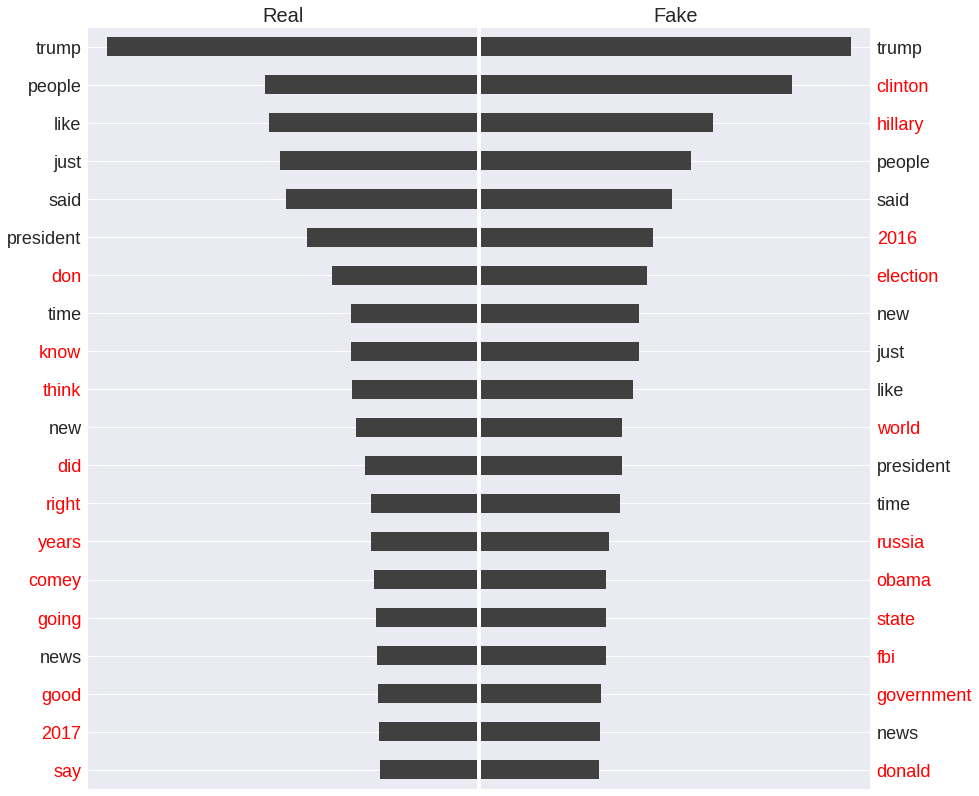

In [18]:
f, ax = plt.subplots(1,2, figsize=(14,14))

cv = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_features=1000)
gram_1 = cv.fit_transform(real['text'].dropna())
real_cv = pd.DataFrame(gram_1.toarray(), columns=cv.get_feature_names())

gram_1f = cv.fit_transform(fake['text'].dropna())
fake_cv = pd.DataFrame(gram_1f.toarray(), columns=cv.get_feature_names())

real_cv.sum(axis=0).sort_values().tail(20).plot(kind='barh', ax = ax[0], color='0.25')
fake_cv.sum(axis=0).sort_values().tail(20).plot(kind='barh', ax = ax[1], color='0.25')

ax[0].tick_params(labelsize=18)
ax[0].set_title('Real', fontsize=20)
ax[0].invert_xaxis()
ax[0].set_xticks([])

ax[1].tick_params(labelsize=18)
ax[1].get_yaxis().set_ticks_position('right')
ax[1].set_title('Fake', fontsize=20)
ax[1].set_xticks([])

#f.tight_layout()
plt.subplots_adjust(wspace=0.01)

ax0_ticks = ax[0].get_yticklabels()
ax1_ticks = ax[1].get_yticklabels()

ax0_ticks_v = [label.get_text() for label in ax0_ticks]
ax1_ticks_v = [label.get_text() for label in ax1_ticks]

for xtick in ax0_ticks:
    if xtick.get_text() not in ax1_ticks_v:
        xtick.set_color('r')

for xtick in ax1_ticks:
    if xtick.get_text() not in ax0_ticks_v:
        xtick.set_color('r')

plt.show()

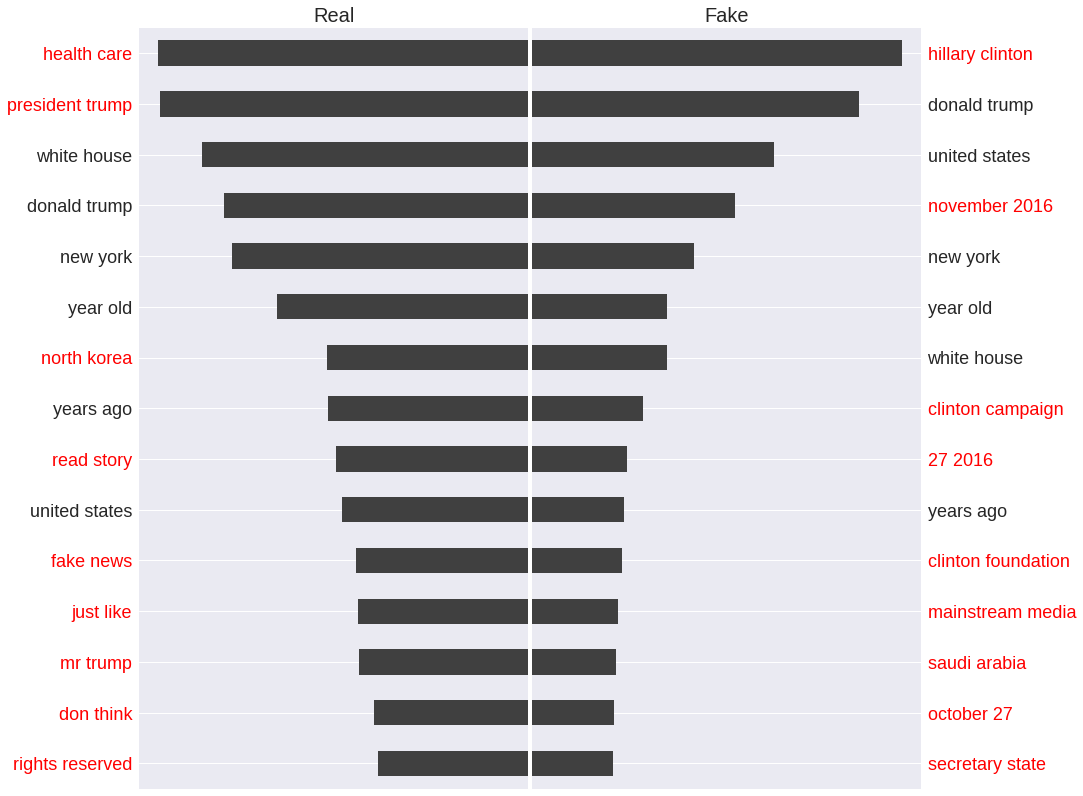

In [20]:
f, ax = plt.subplots(1,2, figsize=(14,14))

cv = TfidfVectorizer(stop_words='english', ngram_range=(2,2), max_features=1000)
gram_1 = cv.fit_transform(real['text'].dropna())
real_cv = pd.DataFrame(gram_1.toarray(), columns=cv.get_feature_names())

gram_1f = cv.fit_transform(fake['text'].dropna())
fake_cv = pd.DataFrame(gram_1f.toarray(), columns=cv.get_feature_names())

filter_list = ['garcia navarro', 'getty images', 'hide caption', 'toggle caption', \
               'caption toggle', 'cbs news', 'enlarge image', 'related videos', 'ha ha',\
               'july 2017', 'don know', 'npr org', 'npr programming', 'terms use',\
               'copyright 2017', 'www npr', 'visit website', '2017 npr', 'form updated',\
               'audio record', 'pages www', 'subscribe sign', 'story subscribe']

real_cv[[c for c in real_cv.columns if c not in filter_list]].sum(axis=0).sort_values()\
.tail(15).plot(kind='barh', ax = ax[0], color='0.25')
fake_cv.sum(axis=0).sort_values().tail(15).plot(kind='barh', ax = ax[1], color='0.25')

ax[0].tick_params(labelsize=18)
ax[0].set_title('Real', fontsize=20)
ax[0].invert_xaxis()
ax[0].set_xticks([])

ax[1].tick_params(labelsize=18)
ax[1].get_yaxis().set_ticks_position('right')
ax[1].set_title('Fake', fontsize=20)
ax[1].set_xticks([])

#f.tight_layout()
plt.subplots_adjust(wspace=0.01)

ax0_ticks = ax[0].get_yticklabels()
ax1_ticks = ax[1].get_yticklabels()

ax0_ticks_v = [label.get_text() for label in ax0_ticks]
ax1_ticks_v = [label.get_text() for label in ax1_ticks]

for xtick in ax0_ticks:
    if xtick.get_text() not in ax1_ticks_v:
        xtick.set_color('r')

for xtick in ax1_ticks:
    if xtick.get_text() not in ax0_ticks_v:
        xtick.set_color('r')

plt.show()